### THIS is try to get the acupoint from hand

In [101]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

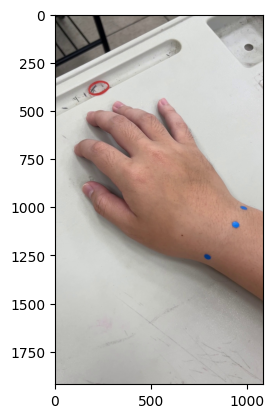

In [102]:
img = cv2.imread('datasets/hand/imgs/3115/28.jpg')
plt.imshow(img[:,:,::-1])

In [103]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

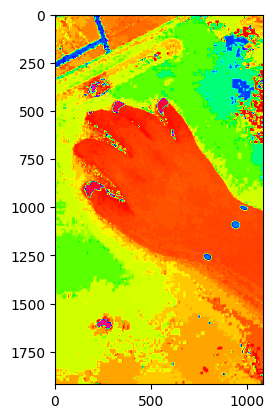

In [104]:
plt.imshow(hsv[:,:,0], cmap='hsv')

In [105]:
lower_blue = np.array([100, 50, 100])
upper_blue = np.array([130, 255, 255])

In [106]:
mask = cv2.inRange(hsv, lower_blue, upper_blue)

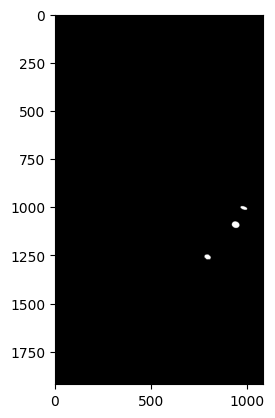

In [107]:
plt.imshow(mask, cmap='gray')

In [108]:
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))

4


In [109]:
def count_distance(x1, y1, x2, y2):
    return np.sqrt((x1 - x2)**2 + (y1 - y2)**2)

In [110]:
merged_contours = []
for i in range(len(contours)):
    merged = False
    for j in range(i + 1, len(contours)):
        M1 = cv2.moments(contours[i])
        M2 = cv2.moments(contours[j])
        if M1['m00'] == 0 or M2['m00'] == 0:
            continue
        cX1 = int(M1['m10'] / M1['m00'])
        cY1 = int(M1['m01'] / M1['m00'])
        cX2 = int(M2['m10'] / M2['m00'])
        cY2 = int(M2['m01'] / M2['m00'])
        if count_distance(cX1, cY1, cX2, cY2) < 30:
            merged = True
            break

    if not merged:
        merged_contours.append(contours[i])


In [111]:
len(merged_contours)

3

In [112]:
keypoints = []
for cnt in contours:
    M = cv2.moments(cnt)
    if M['m00'] == 0:
        continue
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    keypoints.append((cx, cy))

print(keypoints)

[(798, 1273), (791, 1259), (937, 1092), (980, 1006)]


In [113]:
keypoints = []
for cnt in merged_contours:
    M = cv2.moments(cnt)
    if M['m00'] == 0:
        continue
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    keypoints.append((cx, cy))

print(keypoints)

[(791, 1259), (937, 1092), (980, 1006)]


In [114]:
for kp in keypoints:
    cv2.circle(img, kp, 5, (0, 255, 0), -1)

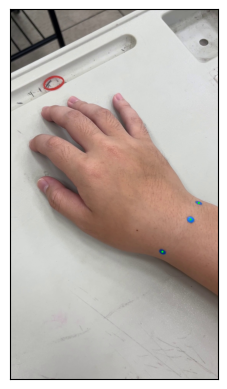

In [115]:
plt.imshow(img[:,:,::-1])
plt.xticks([]), plt.yticks([])
plt.show()

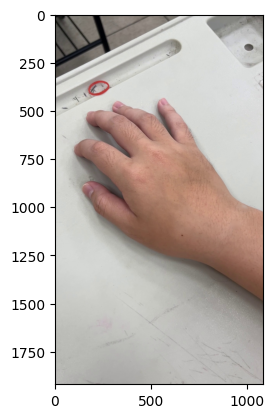

In [116]:
mask = cv2.GaussianBlur(mask, (15, 15), 0)
restored_img = cv2.inpaint(img, mask, 20, cv2.INPAINT_TELEA)
plt.imshow(restored_img[:,:,::-1])

#### Sort the keypoint and give the tags

In [117]:
# detect type of image
# left right top bottom

# find the length of the image
h = img.shape[0] # height
w = img.shape[1] # width

# find the center of the image
cx = w // 2
cy = h // 2

vertical = 0
horizontal = 0

for kp in keypoints:
    if kp[0] > cx:
        horizontal += 1
    
    if kp[1] > cy:
        vertical += 1
    
print('vertical:', vertical)
print('horizontal:', horizontal)

vertical: 3
horizontal: 3


In [118]:
acupoints = {}

## safty check ##
if len(keypoints) != 3:
    print('Error: keypoints are not 3')

## WE have to know the left or right hand, front or back of the hand at first
## then we can decide the acupoints

# sample for right hand, back side
if vertical == 3:
    # bottom
    keypoints = sorted(keypoints, key=lambda x: x[0])
    acupoints['陽溪'] = keypoints[0]
    acupoints['陽池'] = keypoints[1]
    acupoints['陽古'] = keypoints[2]
elif vertical == 0:
    # top
    keypoints = sorted(keypoints, key=lambda x: x[0])
    acupoints['陽古'] = keypoints[0]
    acupoints['陽池'] = keypoints[1]
    acupoints['陽溪'] = keypoints[2]
elif horizontal == 3:
    # right
    keypoints = sorted(keypoints, key=lambda x: x[1])
    acupoints['陽古'] = keypoints[0]
    acupoints['陽池'] = keypoints[1]
    acupoints['陽溪'] = keypoints[2]
elif horizontal == 0:
    # left
    keypoints = sorted(keypoints, key=lambda x: x[1])
    acupoints['陽溪'] = keypoints[0]
    acupoints['陽池'] = keypoints[1]
    acupoints['陽古'] = keypoints[2]